In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import nltk

from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  
from sklearn.linear_model import LogisticRegression

from textblob import TextBlob, Word
from sklearn.svm import SVC
plt.style.use("fivethirtyeight")

In [20]:
papers = pd.read_excel('Paper_dataCompiled.xlsx')
papers.head()

,Source,Title,Abstract,Journal,Author,Date,Keyword,Keyword2,Keyword3,Keyword4,Keyword5,General,Citation,Field,Search Term
0,https://www.semanticscholar.org/paper/Space-ch...,Space-charge limited photocurrent.,""":""In 1971 Goodman and Rose predicted the occu...",Physical review letters,Valentin D. Mihailetchi and Jurjen Wildeman an...,2005,Fullerenes,Immunostimulating conjugate (antigen),Switch Device Component,Semiconductors,light intensity,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Mihailetchi2005SpacechargeLP, title=...",Physics,Space
1,https://www.semanticscholar.org/paper/Separabl...,Separable dual-space Gaussian pseudopotentials.,""":""We present pseudopotential coefficients for...","Physical review. B, Condensed matter",Goedecker and Teter and Hutter,1996,Dual,Normal Statistical Distribution,Multiplication,NaN,NaN,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Goedecker1996SeparableDG, title={Sep...",Physics,Space
2,https://www.semanticscholar.org/paper/Canonica...,Canonical dynamics: Equilibrium phase-space di...,""":""Nose has modified Newtonian dynamics so as ...","Physical review. A, General physics",Hoover,1985,Normal Statistical Distribution,Friction,CNS disorder,Test scaling,NaN,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Hoover1985CanonicalDE, title={Canoni...",Physics,Space
3,https://www.semanticscholar.org/paper/Flat-spa...,Flat-space chiral gravity.,""":""We provide the first evidence for a hologra...",Physical review letters,Arjun Bagchi and St{\'e}phane Detournay and Da...,2012,Holographic principle,Quantum field theory,Calcifying Fibrous Pseudotumor,Hornbostelâ€“Sachs,Battery management system,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Bagchi2012FlatspaceCG, title={Flat-s...",Physics,Space
4,https://www.semanticscholar.org/paper/Polariza...,Polarization demultiplexing in Stokes space.,""":""A technique is demonstrated for polarizatio...",Optics express,Bogdan Szafraniec and Bernd Nebendahl and Todd...,2010,chaperone-mediated autophagy,algorithm,Fiber Optic Cables,NaN,NaN,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Szafraniec2010PolarizationDI, title=...",Physics,Space


In [22]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
Source         2000 non-null object
Title          1990 non-null object
Abstract       2000 non-null object
Journal        1756 non-null object
Author         2000 non-null object
Date           2000 non-null object
Keyword        1852 non-null object
Keyword2       1626 non-null object
Keyword3       1368 non-null object
Keyword4       1123 non-null object
Keyword5       896 non-null object
General        2000 non-null object
Citation       2000 non-null object
Field          2000 non-null object
Search Term    2000 non-null object
dtypes: object(15)
memory usage: 117.2+ KB


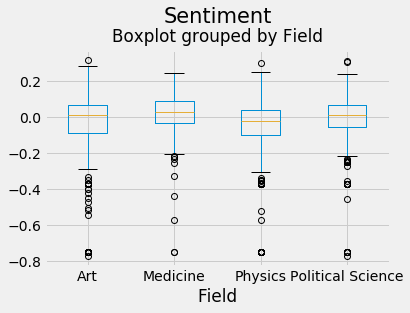

In [24]:
# Sentiment
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

papers["Sentiment"] = papers["Abstract"].apply(detect_sentiment)

ax= papers.boxplot(column="Sentiment", by="Field")
ax.set_title("Sentiment", fontsize=21, y=1.1);

In [26]:
papers["Field"].value_counts(normalize=True)

# So null model would be correct 25% of the time

Physics              0.25
Political Science    0.25
Art                  0.25
Medicine             0.25
Name: Field, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(papers["Abstract"], papers["Field"])

In [32]:
def auto_vect(vect):
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class_first = nb.predict(X_test_dtm)
    print((metrics.accuracy_score(y_test, y_pred_class_first)))

def make_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize(pos="v") for word in words]

In [37]:
vect = CountVectorizer(min_df=2, ngram_range=(1,4), stop_words="english")
auto_vect(vect)

#So this is 93.2% accurate

0.932


In [39]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

# this will be our training prediction
y_pred_class_first = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class_first)))

0.932


In [43]:
print((vect.get_feature_names()[6000:6050]))

['economically', 'economics', 'economics political', 'economics political science', 'economist', 'economy', 'economy emphasising', 'economy emphasising elements', 'economy emphasising elements fragmentation', 'ecosystem', 'ecran', 'ed', 'ed visits', 'edema', 'edge', 'edge research', 'edges', 'edges viewers', 'edges viewers gaze', 'edges viewers gaze image', 'edited', 'editing', 'edition', 'editor', 'editorial', 'editorial board', 'editors', 'eds', 'edu', 'educacion', 'educated', 'educating', 'education', 'education author', 'education curriculum', 'education games', 'education games 17', 'education games 17 injuries', 'education health', 'education including', 'education increasing', 'education level', 'education new', 'education oie', 'education policy', 'education practice', 'education research', 'education social', 'education training', 'educational']


In [41]:
#y_pred_class

# print(metrics.accuracy_score(papers["Field"], y_pred_class_first))